# Imports

In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt

from packages.mining import open_data
from packages.plotting import plot_data
from packages.computing import quantiles, year_vs_climato

from matplotlib.patches import Patch


directory = os.chdir("/home/leopaul/Climate_Change_PO/")

# General view

In [5]:
sr = open_data(
    "data/FRNOR.RR2025010565429.PPDH.KEYuAAuu91dxAxu2BfU7xuA.csv",
    "T"
)

/home/leopaul/Climate_Change_PO/packages/mining.py:23: DtypeWarning: Columns (2,3,6,7,9,10,11,13,17,18,19,21,23,24,25,27,29,40,41,45,49,51,53,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='utf-8')


DatetimeIndex(['1930-08-01 00:00:00', '1930-08-01 03:00:00',
               '1930-08-01 06:00:00', '1930-08-01 09:00:00',
               '1930-08-01 12:00:00', '1930-08-01 15:00:00',
               '1930-08-01 21:00:00', '1930-08-02 00:00:00',
               '1930-08-02 03:00:00', '1930-08-02 06:00:00',
               ...
               '2025-06-28 03:00:00', '2025-06-28 06:00:00',
               '2025-06-28 09:00:00', '2025-06-28 12:00:00',
               '2025-06-28 15:00:00', '2025-06-28 18:00:00',
               '2025-06-28 21:00:00', '2025-06-29 00:00:00',
               '2025-06-29 03:00:00', '2025-06-29 06:00:00'],
              dtype='datetime64[ns]', name='DATE', length=46323, freq=None)


In [6]:
sr_stdy = sr.loc["1960-01-01 00:00:00":"2024-12-31 23:00:00"]
dates_nan = sr_stdy[sr_stdy.isna()].index
nan_by_year = sr_stdy.isna().groupby(sr_stdy.index.year).sum()
nan_by_year = nan_by_year[nan_by_year != 0]
print(nan_by_year)
print(dates_nan)

DATE
1974     1
1991     3
2012     1
2013     2
2014     1
2016     3
2017     7
2019    88
2020    16
2021     2
Name: T, dtype: int64
DatetimeIndex(['1974-04-05 06:00:00', '1991-01-14 12:00:00',
               '1991-01-14 15:00:00', '1991-01-14 18:00:00',
               '2012-02-04 03:00:00', '2013-07-18 00:00:00',
               '2013-07-18 03:00:00', '2014-09-12 09:00:00',
               '2016-09-04 00:00:00', '2016-09-04 03:00:00',
               ...
               '2020-05-10 03:00:00', '2020-05-10 15:00:00',
               '2020-05-10 18:00:00', '2020-05-10 21:00:00',
               '2020-05-11 00:00:00', '2020-05-11 03:00:00',
               '2020-05-11 06:00:00', '2020-06-09 18:00:00',
               '2021-01-25 00:00:00', '2021-01-25 03:00:00'],
              dtype='datetime64[ns]', name='DATE', length=124, freq=None)


## Monthly

DatetimeIndex([], dtype='datetime64[ns]', name='DATE', freq='ME')


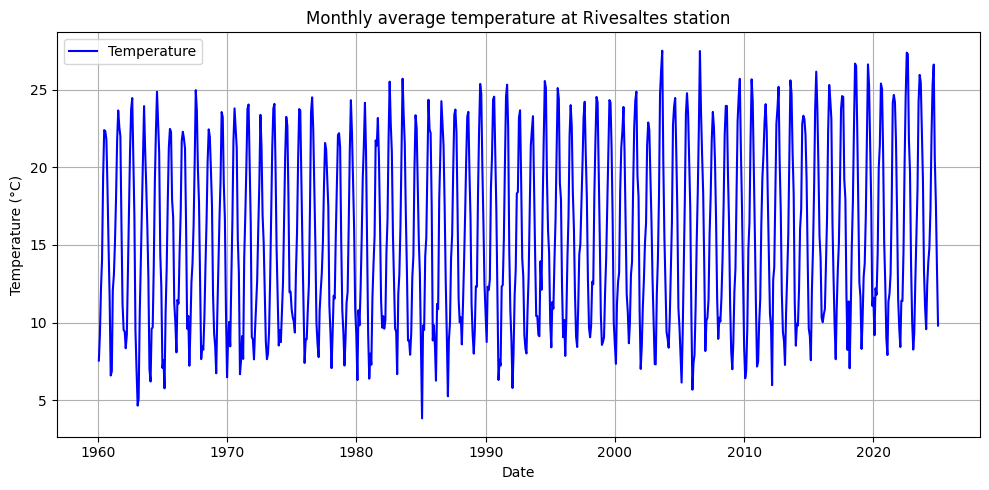

In [8]:
sr_avg_m = sr_stdy.resample("ME").mean()
dates_nan = sr_avg_m[sr_avg_m.isna()].index
print(dates_nan)

plot_data(
    sr_avg_m,
    "Temperature",
    "Monthly average temperature",
    "station/monthly_avg_1960_2024"
)

## Yearly

DatetimeIndex([], dtype='datetime64[ns]', name='DATE', freq='YE-DEC')


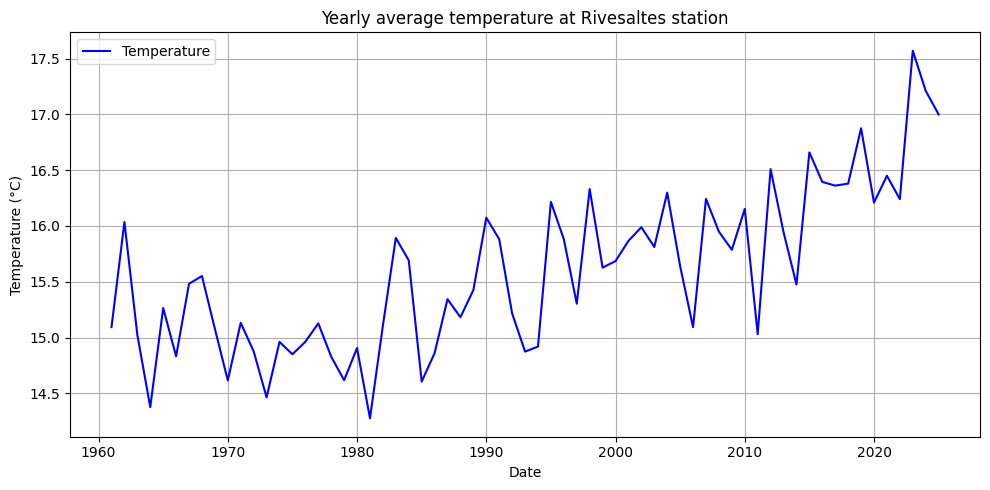

In [9]:
sr_avg_y = sr_stdy.resample("YE").mean()
dates_nan = sr_avg_y[sr_avg_y.isna()].index
print(dates_nan)

plot_data(
    sr_avg_y,
    "Temperature",
    "Yearly average temperature",
    "station/yearly_avg_1960_2024"
)

# Normal

## Basic method

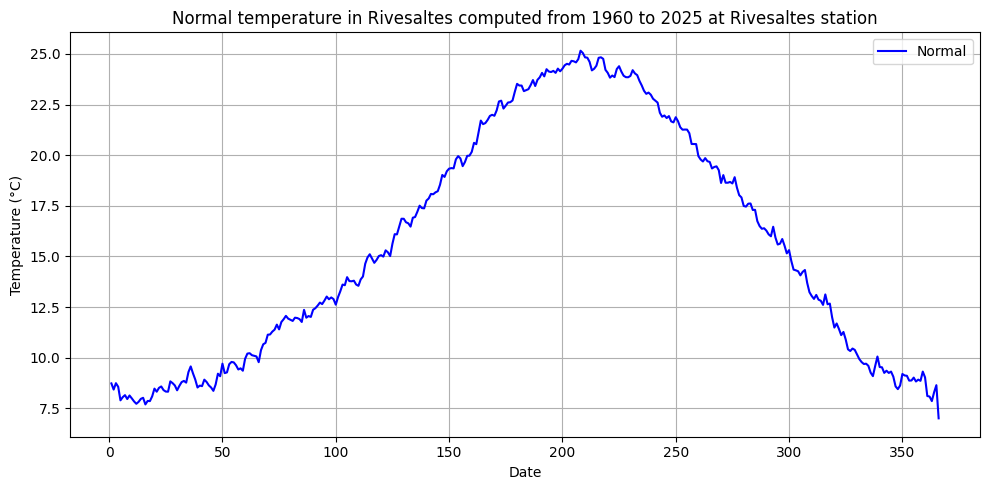

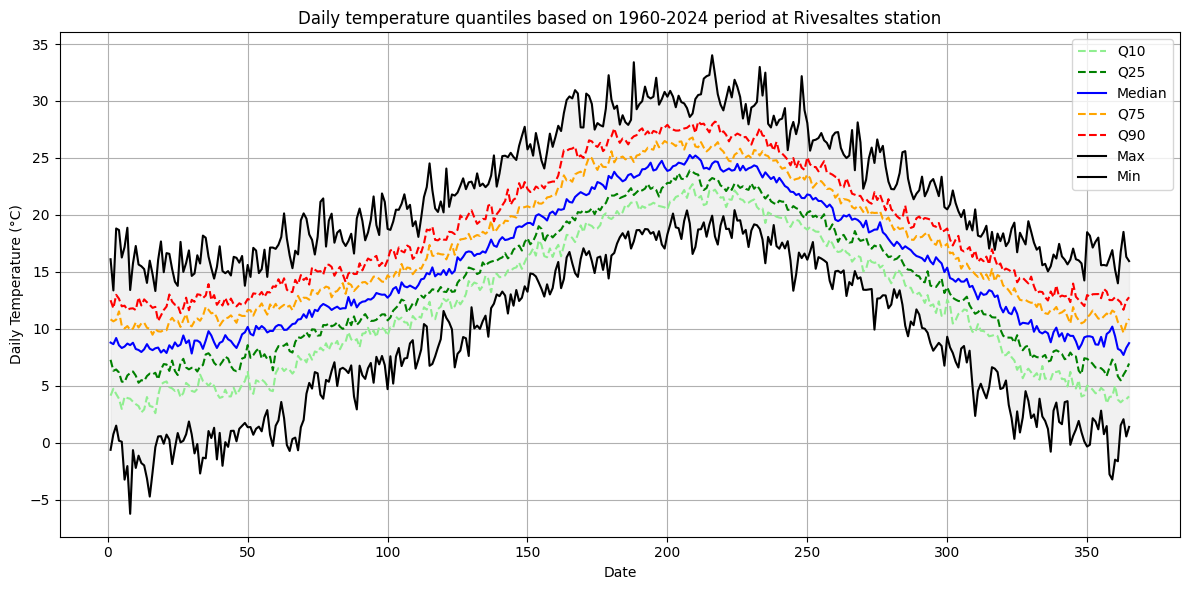

In [10]:
dayofyear = sr_stdy.index.dayofyear
sr_classic_clim = sr_stdy.groupby(dayofyear).mean()

plot_data(
    sr_classic_clim,
    "Normal",
    "Normal temperature in Rivesaltes computed from 1960 to 2025",
    "station/norm_temp_1960_2025"
)

dic_bm_q = quantiles(
    sr_stdy,
    "Daily temperature quantiles based on 1960-2024 period at Rivesaltes station",
    "Daily Temperature (°C)",
    "temp/station/temp_q_1960_2024"
)

## Meteo France method

### 1960-1989

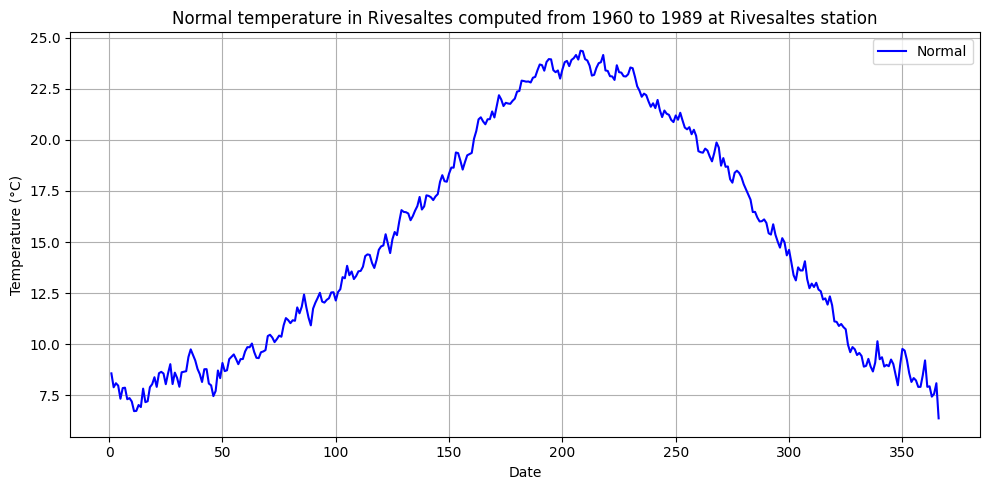

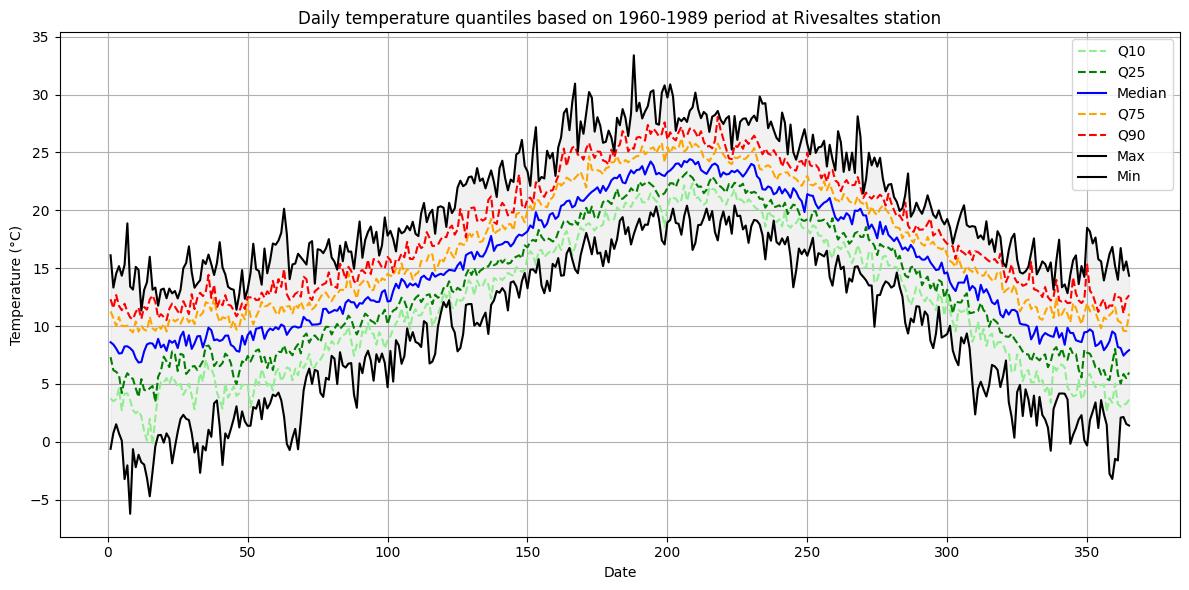

In [11]:
sr_clim_frst = sr.loc["1960-01-01 00:00:00":"1989-12-31 23:00:00"]
dayofyear = sr_clim_frst.index.dayofyear
sr_clim_mf_frst = sr_clim_frst.groupby(dayofyear).mean()

plot_data(
    sr_clim_mf_frst,
    "Normal",
    "Normal temperature in Rivesaltes computed from 1960 to 1989",
    "station/norm_temp_1960_1989"
)

dic_quantiles_frst = quantiles(
    sr_clim_frst,
    "Daily temperature quantiles based on 1960-1989 period at Rivesaltes station",
    "Temperature (°C)",
    "temp/station/temp_q_1960_1989"
)

### 1990-2019

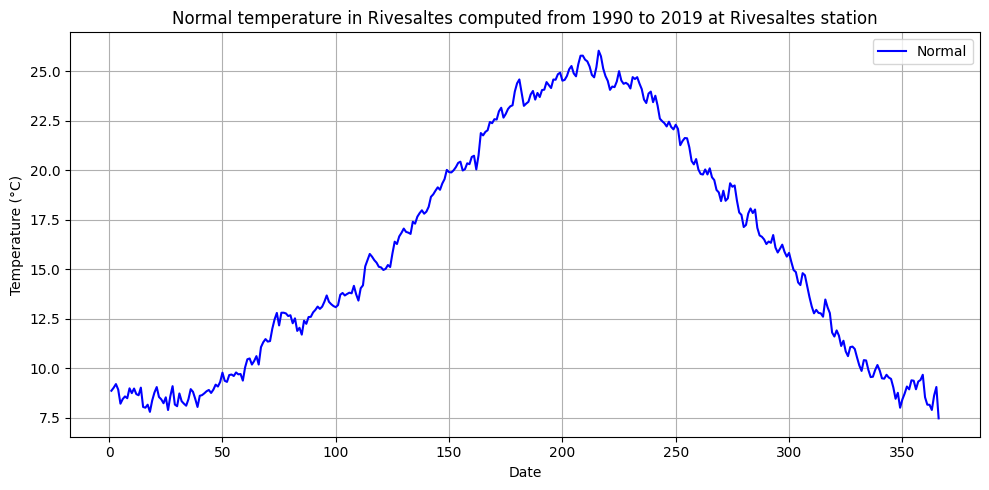

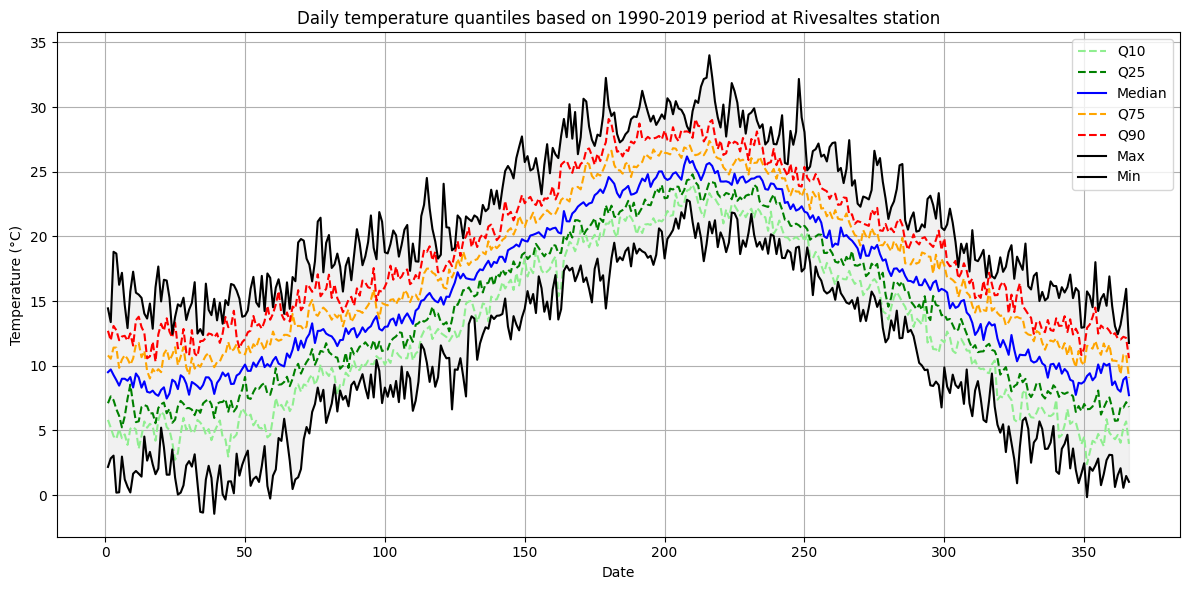

In [8]:
sr_clim_snd = sr.loc["1990-01-01 00:00:00":"2019-12-31 23:00:00"]
dayofyear = sr_clim_snd.index.dayofyear
sr_clim_mf_snd = sr_clim_snd.groupby(dayofyear).mean()

plot_data(
    sr_clim_mf_snd,
    "Normal",
    "Normal temperature in Rivesaltes computed from 1990 to 2019",
    "norm_temp_1990_2019"
)

dic_quantiles_snd = quantiles(
    sr_clim_snd,
    "Daily temperature quantiles based on 1990-2019 period at Rivesaltes station",
    "Temperature (°C)",
    "temp/temp_q_1990_2019"
)

#### Monthly evolution 

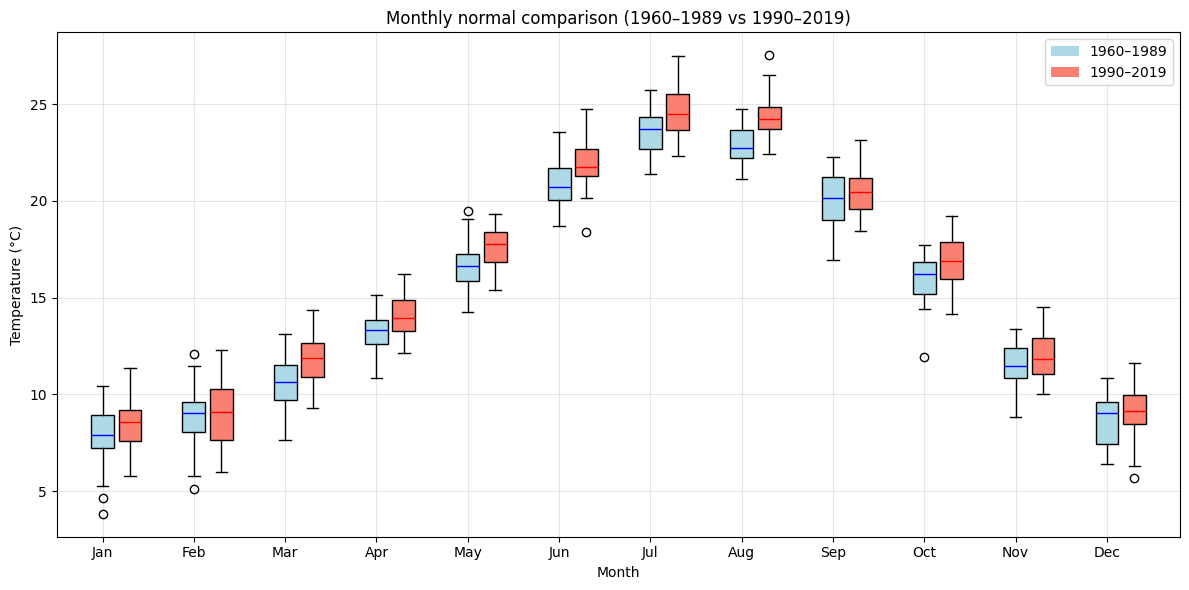

In [9]:
sr_m_nrm_first = sr_avg_m.loc["1960-01-31":"1989-12-31"]
sr_m_nrm_sec = sr_avg_m.loc["1990-01-31":"2019-12-31"]

# Groupement mensuel
group_first = [sr_m_nrm_first[sr_m_nrm_first.index.month == m] for m in range(1, 13)]
group_sec   = [sr_m_nrm_sec[sr_m_nrm_sec.index.month == m] for m in range(1, 13)]

# Préparation du graphique
plt.figure(figsize=(12, 6))

positions_first = range(1, 13)
positions_sec = [p + 0.3 for p in positions_first]  # décalage pour séparer les boxplots

# Boxplots
plt.boxplot(
    group_first, 
    positions=positions_first, 
    widths=0.25, 
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"), 
    medianprops=dict(color="blue")
    )
plt.boxplot(
    group_sec, 
    positions=positions_sec, 
    widths=0.25, 
    patch_artist=True,
    boxprops=dict(facecolor="salmon"), 
    medianprops=dict(color="red")
    )

# Personnalisation
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
           )
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly normal comparison (1960–1989 vs 1990–2019)")
plt.legend(
    handles=[
        Patch(facecolor="lightblue", label="1960–1989"),
        Patch(facecolor="salmon", label="1990–2019")
    ],
    loc="upper right"
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

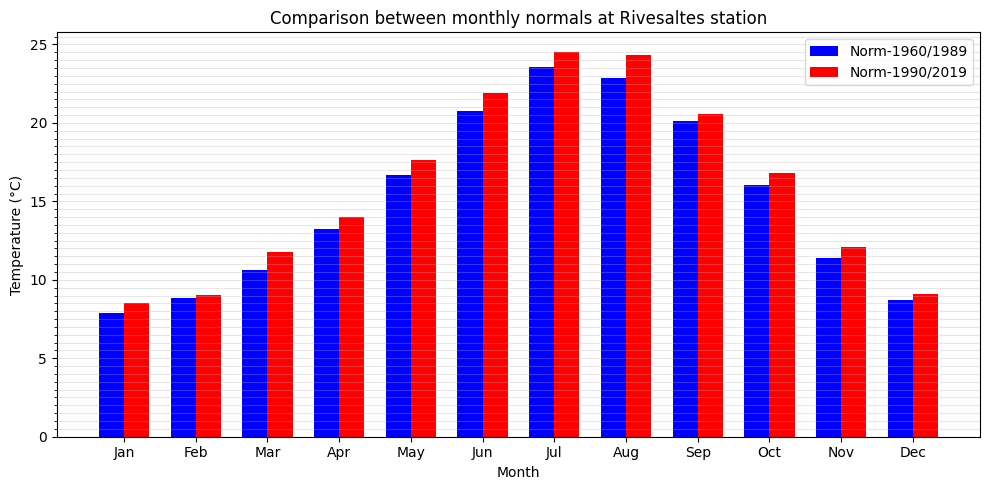

In [10]:
clim_frst_m = sr_m_nrm_first.groupby(sr_m_nrm_first.index.month).mean()
clim_sec_m = sr_m_nrm_sec.groupby(sr_m_nrm_sec.index.month).mean()

plt.figure(figsize=(10, 5))
x = np.arange(1, 13)  # positions pour les 12 mois
width = 0.35

plt.bar(x - width/2, clim_frst_m.values, width=width, label="Norm-1960/1989", color="blue")
plt.bar(x + width/2, clim_sec_m.values,  width=width, label="Norm-1990/2019", color="red")

plt.xticks(x, ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Comparison between monthly normals at Rivesaltes station")
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.grid(True, which="both", axis="y", alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figs/temp/monthly_norms_comparison_bar.png", dpi=300, bbox_inches="tight")
plt.show()

#### From 1995-2024

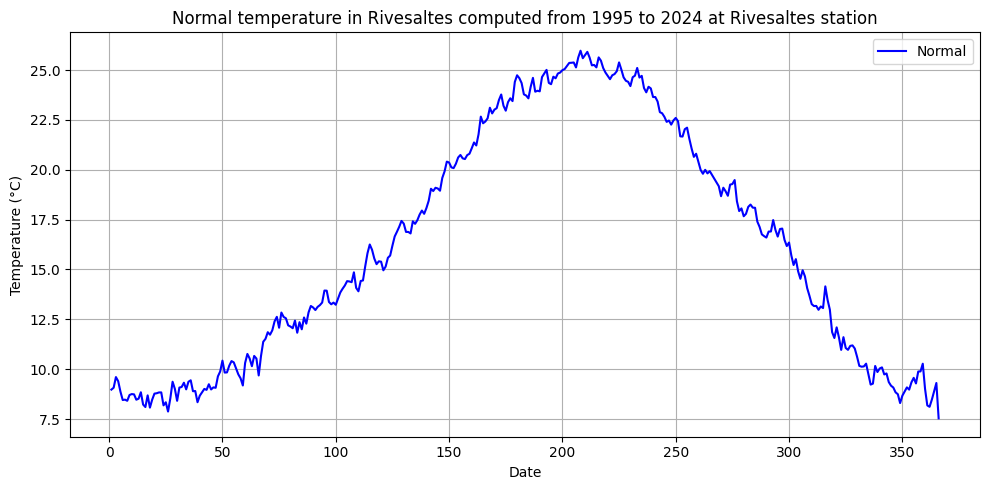

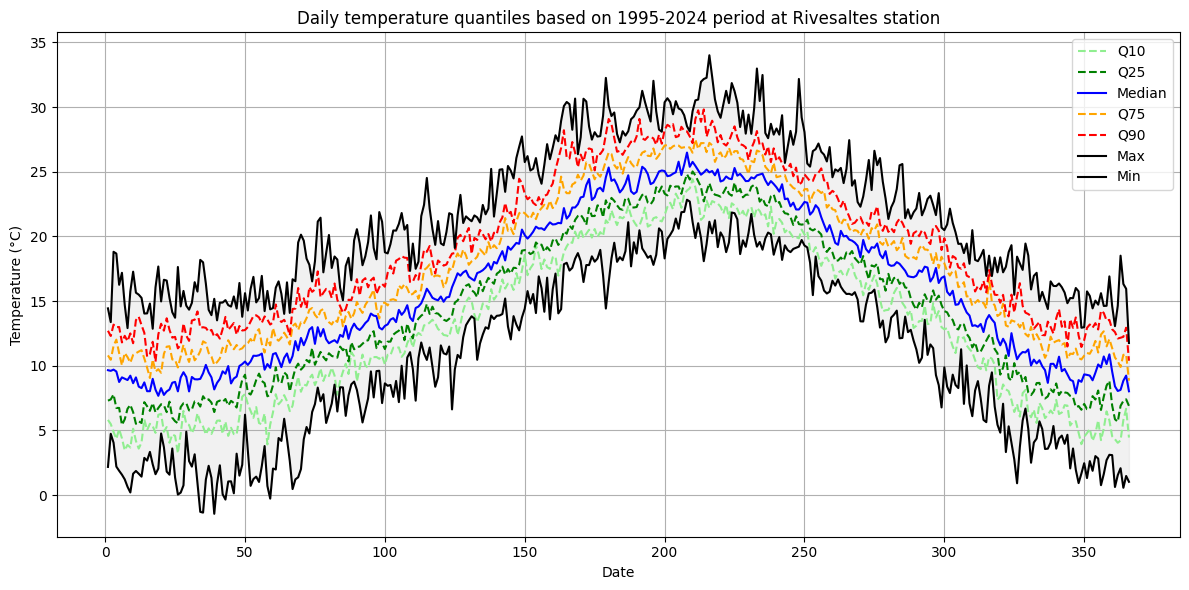

In [11]:
sr_clim_post_snd = sr.loc["1995-01-01 00:00:00":"2024-12-31 23:00:00"]
dayofyear = sr_clim_post_snd.index.dayofyear
climato_post_sec = sr_clim_post_snd.groupby(dayofyear).mean()

plot_data(
    climato_post_sec,
    "Normal",
    "Normal temperature in Rivesaltes computed from 1995 to 2024",
    "norm_temp_1995_2024"
)

dic_quantiles_post_snd = quantiles(
    sr_clim_post_snd,
    "Daily temperature quantiles based on 1995-2024 period at Rivesaltes station",
    "Temperature (°C)",
    "temp/temp_q_1995_2024"
)

# Norms comparison

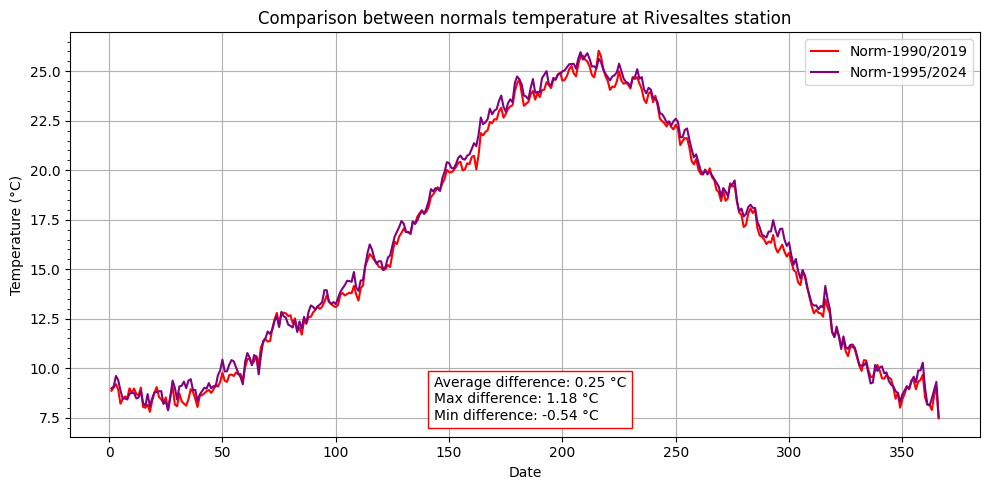

In [12]:
sr_diff = climato_post_sec - sr_clim_mf_snd
average = sr_diff.mean().round(2)
max_diff = sr_diff.max().round(2)
min_diff = sr_diff.min().round(2)

txt = f"Average difference: {average} °C\nMax difference: {max_diff} °C\nMin difference: {min_diff} °C"

fig, ax = plt.subplots(figsize=(10, 5)) 

ax.plot(
    sr_clim_mf_snd.index,
    sr_clim_mf_snd,
    label="Norm-1990/2019",
    color="red"
    ) 
ax.plot(
    climato_post_sec.index,
    climato_post_sec,
    label="Norm-1995/2024",
    color="purple"
    ) 

ax.set_title("Comparison between normals temperature at Rivesaltes station") 
ax.set_xlabel("Date") 
ax.set_ylabel("Temperature (°C)") 
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.text(
    0.40, 0.035,
    txt,
    transform=ax.transAxes,
    va="bottom",
    ha="left",
    fontsize=10,
    bbox=dict(facecolor="white", alpha=1, edgecolor="red")  
)
ax.grid(True) 
ax.legend() 
plt.tight_layout() 
plt.savefig(
    "figs/temp/norms_comparison.png",
    dpi=300,
    bbox_inches="tight"
)

# Computing based on 20 years

In [13]:
sr_clim = sr.loc["1965-01-01 00:00:00":"1984-12-31 23:00:00"]
dayofyear = sr_clim.index.dayofyear
climato_short_range_one = sr_clim.groupby(dayofyear).mean()

sr_clim = sr.loc["1985-01-01 00:00:00":"2004-12-31 23:00:00"]
dayofyear = sr_clim.index.dayofyear
climato_short_range_two = sr_clim.groupby(dayofyear).mean()

sr_clim = sr.loc["2005-01-01 00:00:00":"2024-12-31 23:00:00"]
dayofyear = sr_clim.index.dayofyear
climato_short_range_three = sr_clim.groupby(dayofyear).mean()

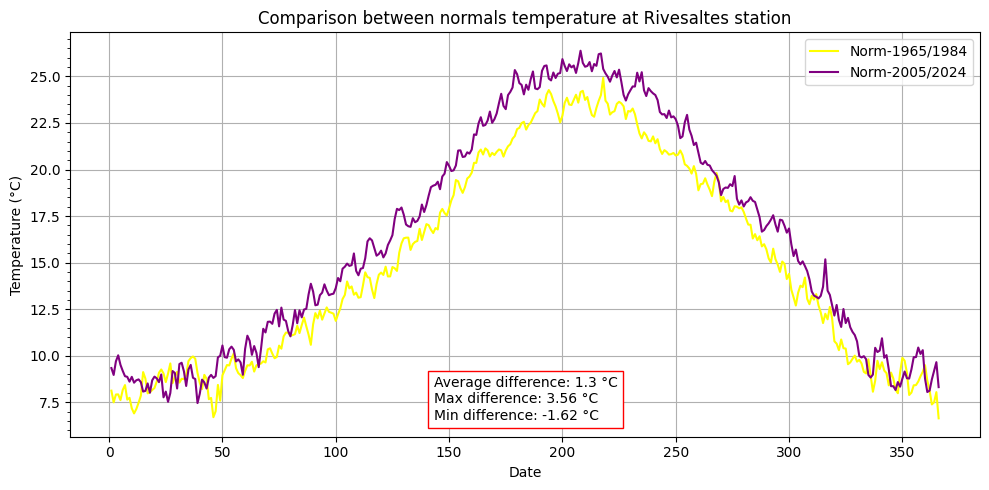

In [14]:
sr_diff = climato_short_range_three - climato_short_range_one
average = sr_diff.mean().round(2)
max_diff = sr_diff.max().round(2)
min_diff = sr_diff.min().round(2)

txt = f"Average difference: {average} °C\nMax difference: {max_diff} °C\nMin difference: {min_diff} °C"

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(
    climato_short_range_one.index,
    climato_short_range_one,
    label="Norm-1965/1984",
    color="yellow"
    ) 
#plt.plot(climato_short_range_two.index,climato_short_range_two,label="Norm-1985/2004",color="red") 
ax.plot(
    climato_short_range_three.index,
    climato_short_range_three,
    label="Norm-2005/2024",
    color="purple"
    ) 

ax.set_title("Comparison between normals temperature at Rivesaltes station") 
ax.set_xlabel("Date") 
ax.set_ylabel("Temperature (°C)") 
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.text(
    0.40, 0.035,
    txt,
    transform=ax.transAxes,
    va="bottom",
    ha="left",
    fontsize=10,
    bbox=dict(facecolor="white", alpha=1, edgecolor="red")  
)
ax.grid(True) 
ax.legend() 
plt.tight_layout() 
plt.savefig(
    "figs/temp/norms_short_comparison.png",
    dpi=300,
    bbox_inches="tight"
)

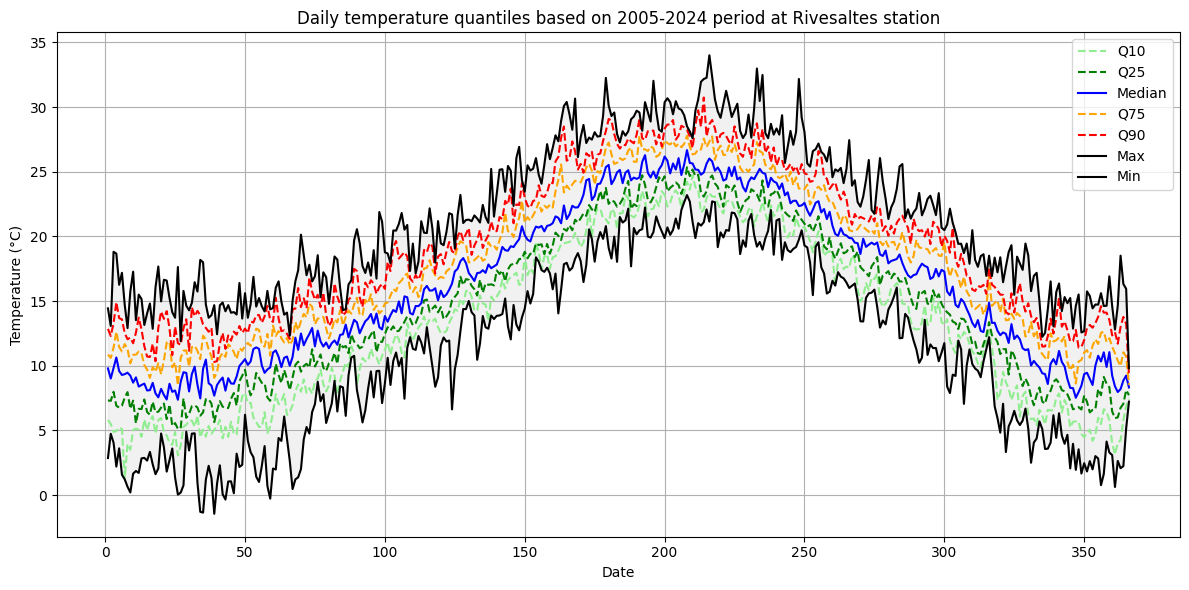

In [15]:
dic_q = quantiles(
    sr_clim,
    "Daily temperature quantiles based on 2005-2024 period at Rivesaltes station",
    "Temperature (°C)",
    "temp/temp_q_2005_2024"
)

## What about the current years

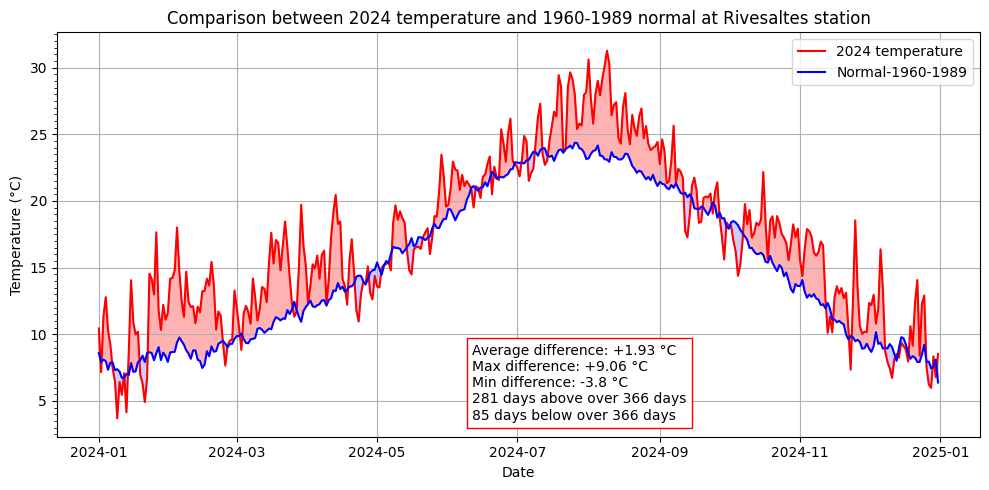

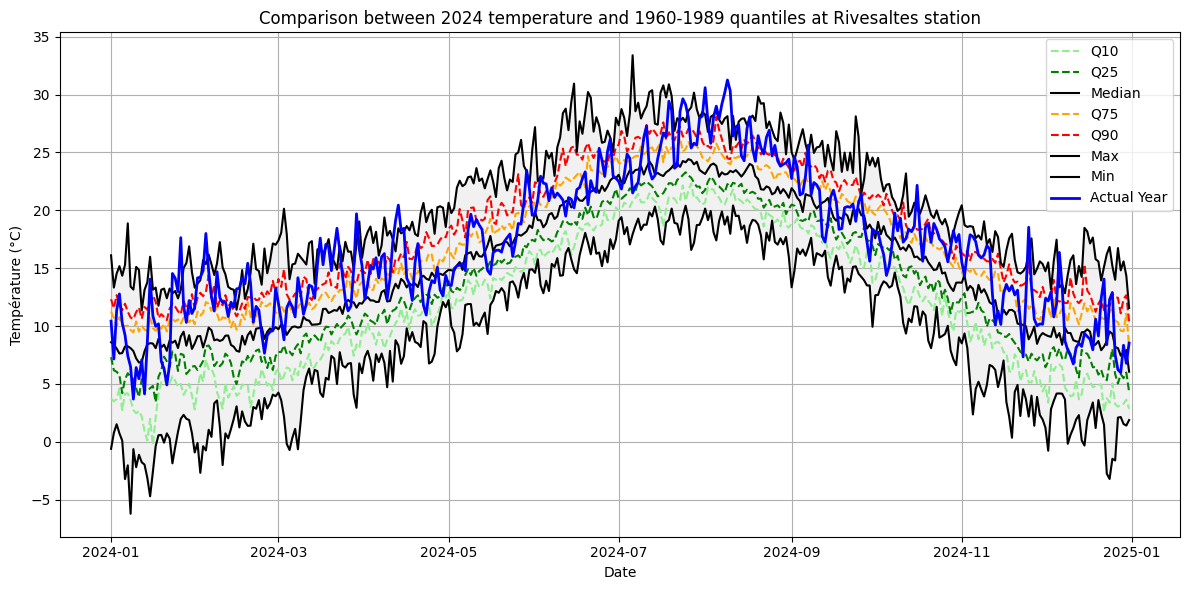

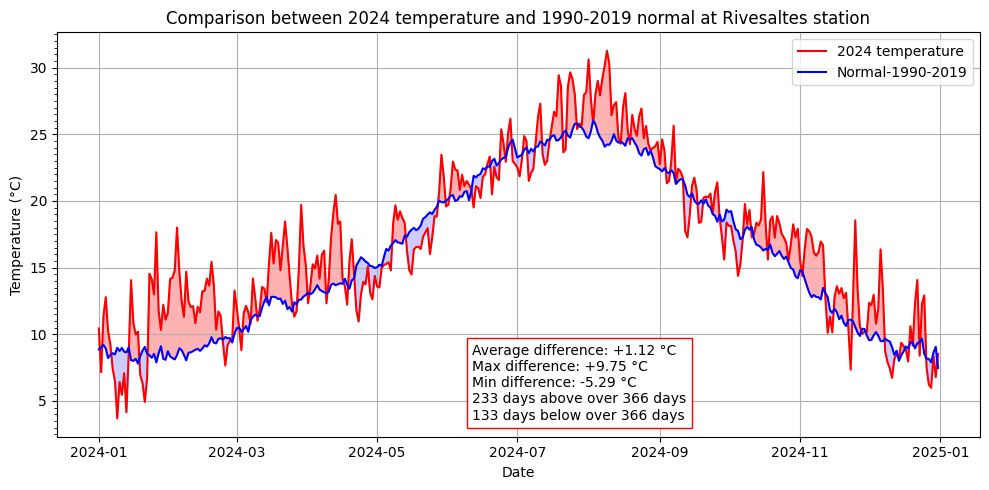

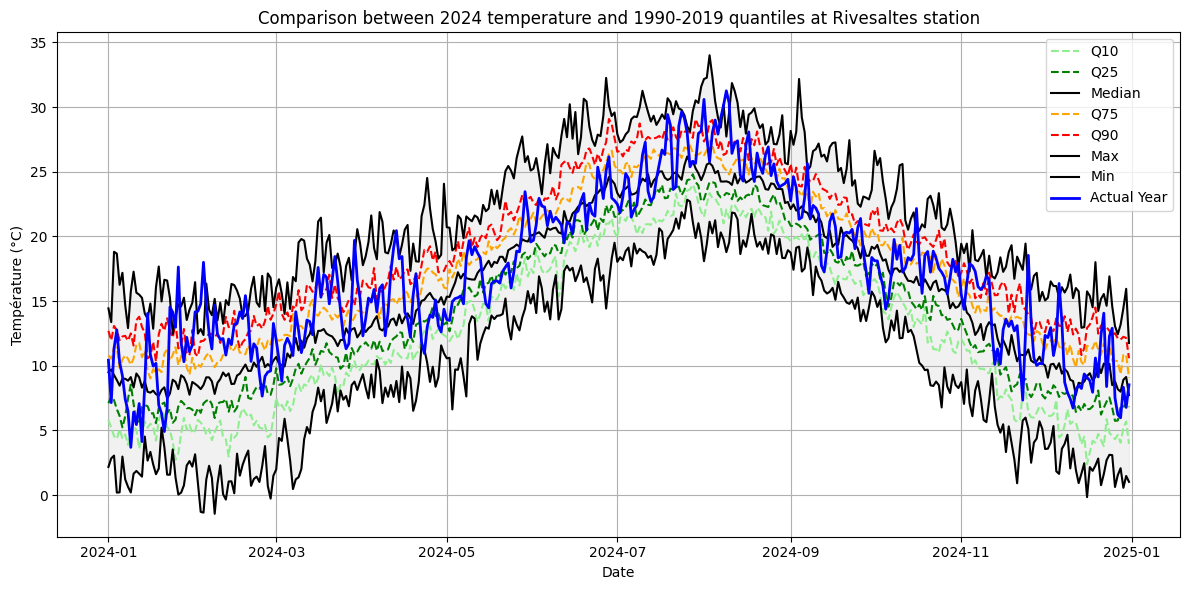

In [16]:
year_vs_climato(
    sr,
    sr_clim_mf_frst,
    dic_quantiles_frst,
    "1960-1989",
    "2024-01-01 00:00:00",
    "2024-12-31 23:00:00"
)

year_vs_climato(
    sr,
    sr_clim_mf_snd,
    dic_quantiles_snd,
    "1990-2019",
    "2024-01-01 00:00:00",
    "2024-12-31 23:00:00"
)

# Seasonnal study

## DJF

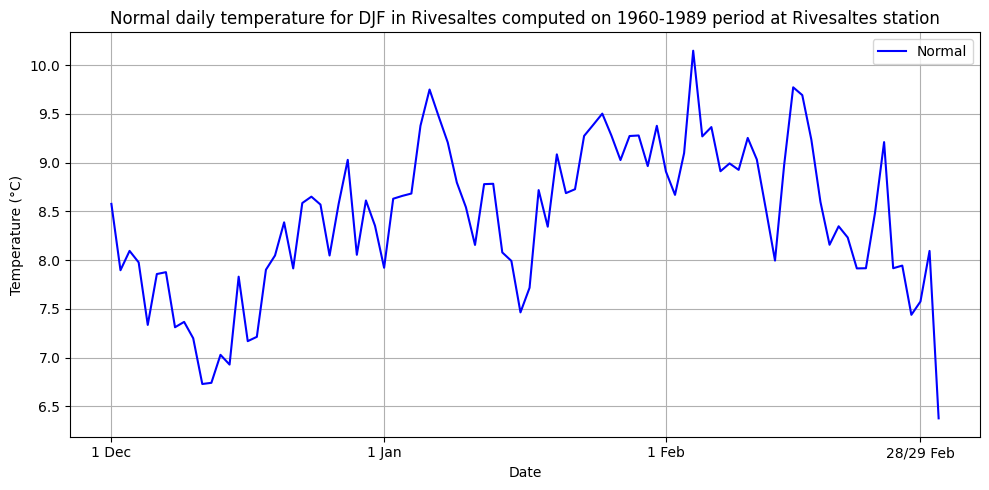

In [17]:
sr_frst_DJF = sr_clim_frst[sr_clim_frst.index.month.isin([12,1,2])]
dayofyear = sr_frst_DJF.index.dayofyear
sr_clim_frst_DJF = sr_frst_DJF.groupby(dayofyear).mean()

plot_data(
    sr = sr_clim_frst_DJF,
    var_name = "Normal",
    var_call = "Normal daily temperature for DJF in Rivesaltes computed on 1960-1989 period",
    img_title = "norm_temp_DJF_1960_1989",
    season = "DJF"
)